In [2]:
import warnings
warnings.simplefilter('ignore')

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import tree
from datetime import timedelta
from datetime import datetime

from math import log

In [3]:
# ds2 = pd.read_csv("https://abe-southside-final-project.s3.us-east-2.amazonaws.com/athletes.csv",index_col=[0])
# ds2.dtypes
# ds2.head()

In [158]:
olympics = pd.read_csv('athlete_events.csv')
olympics.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [159]:
sports = ['Swimming']

olympics = olympics[olympics['Season'] == 'Summer']
olympics = olympics[olympics['Sport'].isin(sports)]
olympics = olympics[olympics['Year']< 2016]
olympics = olympics[olympics['Sex']== 'M']
olympics = olympics[olympics['Height'].notna()]
olympics = olympics[olympics['Weight'].notna()] 
# olympics = olympics[olympics['Medal'] == 'Gold']

Text(0, 0.5, 'Weight')

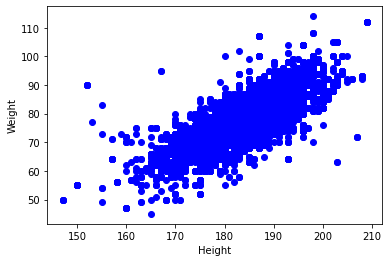

In [142]:
Z = olympics['Height']
W = olympics['Weight']
A = olympics['Age']

plt.scatter(Z,W,c="blue")
plt.xlabel("Height")
plt.ylabel("Weight")

Text(0, 0.5, 'Age')

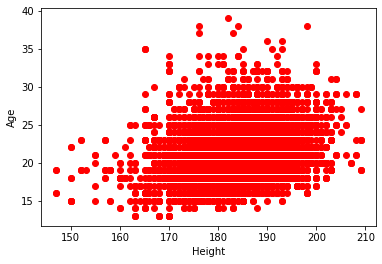

In [143]:
plt.scatter(Z,A,c="red")
plt.xlabel("Height")
plt.ylabel("Age")

No handles with labels found to put in legend.


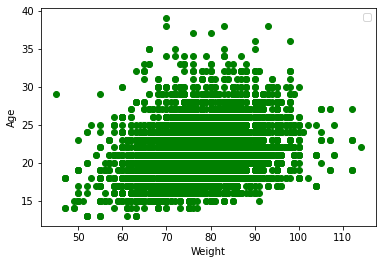

In [144]:
plt.scatter(W,A,c="green")
plt.xlabel("Weight")
plt.ylabel("Age")
plt.legend()

plt.show()

In [160]:
# olympics.loc[(olympics['Medal'] == 'Gold'),'Medal']='Medal'
# olympics.loc[(olympics['Medal'] == 'Silver'),'Medal']='Medal'
# olympics.loc[(olympics['Medal'] == 'Bronze'),'Medal']='Medal'
# olympics.loc[(olympics['Medal'].isna()),'Medal']= 'Non-Medal'

# wins = ['Gold','Bronze']

# olympics = olympics[olympics['Medal'].isin(wins)]

olympics.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
100,36,Stefan Remco Aartsen,M,21.0,194.0,78.0,Netherlands,NED,1996 Summer,1996,Summer,Atlanta,Swimming,Swimming Men's 100 metres Butterfly,NaN
101,36,Stefan Remco Aartsen,M,21.0,194.0,78.0,Netherlands,NED,1996 Summer,1996,Summer,Atlanta,Swimming,Swimming Men's 200 metres Butterfly,NaN
102,36,Stefan Remco Aartsen,M,21.0,194.0,78.0,Netherlands,NED,1996 Summer,1996,Summer,Atlanta,Swimming,Swimming Men's 4 x 100 metres Medley Relay,NaN
103,36,Stefan Remco Aartsen,M,25.0,194.0,78.0,Netherlands,NED,2000 Summer,2000,Summer,Sydney,Swimming,Swimming Men's 100 metres Butterfly,NaN
104,36,Stefan Remco Aartsen,M,25.0,194.0,78.0,Netherlands,NED,2000 Summer,2000,Summer,Sydney,Swimming,Swimming Men's 200 metres Butterfly,NaN


In [161]:
olympics['Medal'].unique()

array([nan, 'Silver', 'Bronze', 'Gold'], dtype=object)

(9552, 1) (9552,)


ValueError: could not convert string to float: 'Silver'

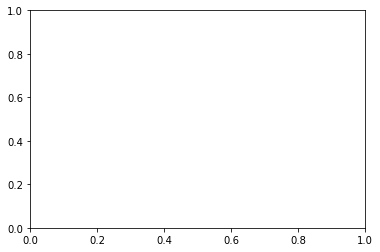

In [162]:
# X = pd.get_dummies(olympics[["Height","Weight"]])
X = olympics[["Height"]]
y = olympics["Medal"]
print(X.shape, y.shape)

plt.scatter(X,y)

In [135]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [136]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [137]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.8707426018983808
Testing Data Score: 0.8739530988274706


In [138]:
predictions = classifier.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   ['Non-Medal' 'Non-Medal' 'Non-Medal' 'Non-Medal' 'Non-Medal' 'Non-Medal'
 'Non-Medal' 'Non-Medal' 'Non-Medal' 'Non-Medal']
First 10 Actual labels: ['Non-Medal', 'Non-Medal', 'Non-Medal', 'Medal', 'Non-Medal', 'Non-Medal', 'Non-Medal', 'Non-Medal', 'Medal', 'Non-Medal']


In [139]:
Testing = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
Testing

,Prediction,Actual
0,Non-Medal,Non-Medal
1,Non-Medal,Non-Medal
2,Non-Medal,Non-Medal
3,Non-Medal,Medal
4,Non-Medal,Non-Medal
...,...,...
2383,Non-Medal,Non-Medal
2384,Non-Medal,Non-Medal
2385,Non-Medal,Non-Medal
2386,Non-Medal,Non-Medal


In [141]:
# Testing[(Testing['Actual'] != 'Others') & (Testing['Prediction'] != 'Others')]
Testing[(Testing['Prediction'] == 'Medal')]
# Testing[(Testing['Prediction'] == 'Non-Medal')]

,Prediction,Actual


DECISION TREE

In [163]:
X = pd.get_dummies(olympics[["Sex", "Age", "Height", "Weight"]])
y = olympics["Medal"].values.reshape(-1,1)
print(X.shape, y.shape)
feature_names = X

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

sorted(zip(rf.feature_importances_, feature_names), reverse=True)

(9552, 4) (9552, 1)


ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

Random Forest

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

# Create a random forest classifier
rf = rf.fit(X, y)
rf.score(X, y)

# Random Forests in sklearn will automatically calculate feature importance
importances = rf.feature_importances_
importances

# We can sort the features by their importance
sorted(zip(rf.feature_importances_, X), reverse=True)

NameError: name 'rf' is not defined